In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [ ]:
df = pd.read_csv('diamonds_hw.csv')

NameError: ignored

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isnull().sum()

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#df['dimension'] = df['x'] * df['y'] * df['z']

Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:

*   List item
*   List item


- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [ ]:
df_update = df.copy()
df_update['carat'] = df_update['carat'].fillna(df_update['carat'].mean())

In [ ]:
df_update.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Saya memilih metode Mean untuk mengisi missing value pada kolom Carat karena jumlah missing value yang sedikit, yaitu 124 (0,23 persen dari total jumlah baris data total sebesar 53.940 baris)

#### Nomor 2:

In [ ]:
df_update['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

peringkat numerical akan diubah menjadi peringkat 1 (best) sampai 8 (worst)

In [ ]:
df_update['clarity'] = [8 if x == 'I1' else (7 if x == 'SI2' else (6 if x == 'SI1' else (5 if x == 'VS2' else (4 if x == 'VS1' else (2 if x == 'VVS2' else (2 if x == 'VVS1' else 1 )))))) for x in df_update['clarity']]

In [ ]:
df_update.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,7,63.3,58.0,335,4.34,4.35,2.75


#### Nomor 3:

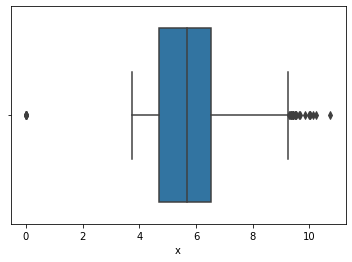

In [ ]:
import seaborn as sns
sns.boxplot(x=df_update['x'])
plt.show()

outlier yang muncul pada kolom X adalah panjang (length) yang (kurang lebih) lebih besar dari 9.3mm dan lebih kecil dari 4mm


In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [ ]:
df_update['outlier_x'] = check_outlier(data=df_update, column='x')

In [ ]:
#menampilkan baris data yang outlier berdasarkan kolom x
df_update[df_update['outlier_x'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
11182,1.07,Ideal,F,7,61.6,56.0,4954,0.00,6.62,0.00,outlier,not-outlier,outlier
11963,1.00,Very Good,H,5,63.3,53.0,5139,0.00,0.00,0.00,outlier,outlier,outlier
15951,1.14,Fair,G,4,57.5,67.0,6381,0.00,0.00,0.00,outlier,outlier,outlier
22741,3.01,Fair,H,8,56.1,62.0,10761,9.54,9.38,5.31,outlier,outlier,not-outlier
22831,3.00,Good,I,8,57.0,64.0,10863,9.38,9.31,5.33,outlier,outlier,not-outlier
23644,3.65,Fair,H,8,67.1,53.0,11668,9.53,9.48,6.38,outlier,outlier,outlier
24131,3.24,Premium,H,8,62.1,58.0,12300,9.44,9.40,5.85,outlier,outlier,outlier
24297,3.22,Ideal,I,8,62.6,55.0,12545,9.49,9.42,5.92,outlier,outlier,outlier
24328,3.50,Ideal,H,8,62.8,57.0,12587,9.65,9.59,6.03,outlier,outlier,outlier
24520,1.56,Ideal,G,5,62.2,54.0,12800,0.00,0.00,0.00,outlier,outlier,outlier


In [ ]:
df_update[df_update['outlier_x'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 11182 to 49557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      32 non-null     float64
 1   cut        32 non-null     object 
 2   color      32 non-null     object 
 3   clarity    32 non-null     int64  
 4   depth      32 non-null     float64
 5   table      32 non-null     float64
 6   price      32 non-null     int64  
 7   x          32 non-null     float64
 8   y          32 non-null     float64
 9   z          32 non-null     float64
 10  outlier_x  32 non-null     object 
 11  outlier_y  32 non-null     object 
 12  outlier_z  32 non-null     object 
dtypes: float64(6), int64(2), object(5)
memory usage: 3.5+ KB


jumlah baris data yang outlier pada kolom x adalah sejumlah 32 baris data

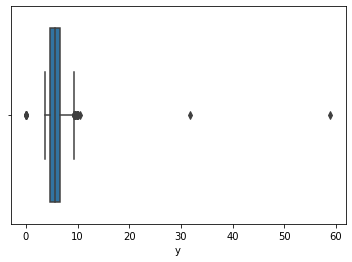

In [ ]:
#boxplot dari nilai kolom y
sns.boxplot(x=df_update['y'])
plt.show()

outlier yang muncul adalah data dengan nilai y (width) lebih besar dari 9mm dan lebih kecil dari (sekitar) 4mm

In [ ]:
#menampilkan baris data yang termasuk outlier berdasarkan kolom y
df_update['outlier_y'] = check_outlier(data=df_update, column='y')
df_update[df_update['outlier_y'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
11963,1.00,Very Good,H,5,63.3,53.0,5139,0.00,0.00,0.00,outlier,outlier,outlier
15951,1.14,Fair,G,4,57.5,67.0,6381,0.00,0.00,0.00,outlier,outlier,outlier
22741,3.01,Fair,H,8,56.1,62.0,10761,9.54,9.38,5.31,outlier,outlier,not-outlier
22831,3.00,Good,I,8,57.0,64.0,10863,9.38,9.31,5.33,outlier,outlier,not-outlier
23644,3.65,Fair,H,8,67.1,53.0,11668,9.53,9.48,6.38,outlier,outlier,outlier
24067,2.00,Premium,H,7,58.9,57.0,12210,8.09,58.90,8.06,not-outlier,outlier,outlier
24131,3.24,Premium,H,8,62.1,58.0,12300,9.44,9.40,5.85,outlier,outlier,outlier
24297,3.22,Ideal,I,8,62.6,55.0,12545,9.49,9.42,5.92,outlier,outlier,outlier
24328,3.50,Ideal,H,8,62.8,57.0,12587,9.65,9.59,6.03,outlier,outlier,outlier
24520,1.56,Ideal,G,5,62.2,54.0,12800,0.00,0.00,0.00,outlier,outlier,outlier


In [ ]:
df_update[df_update['outlier_y'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 11963 to 49557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      29 non-null     float64
 1   cut        29 non-null     object 
 2   color      29 non-null     object 
 3   clarity    29 non-null     int64  
 4   depth      29 non-null     float64
 5   table      29 non-null     float64
 6   price      29 non-null     int64  
 7   x          29 non-null     float64
 8   y          29 non-null     float64
 9   z          29 non-null     float64
 10  outlier_x  29 non-null     object 
 11  outlier_y  29 non-null     object 
 12  outlier_z  29 non-null     object 
dtypes: float64(6), int64(2), object(5)
memory usage: 3.2+ KB


jumlah baris data yang outlier pada kolom y adalah sejumlah 29 baris data

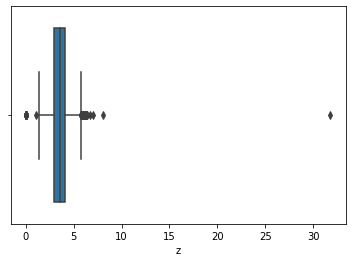

In [ ]:
#menampilkan boxplot nilai kolom z
sns.boxplot(x=df_update['z'])
plt.show()

outlier yang muncul adalah data dengan nilai z (depth) lebih besar dari 5mm dan lebih kecil dari (sekitar) 2mm

In [ ]:
#menampilkan baris data yang outlier berdasarkan nilai kolom z
df_update['outlier_z'] = check_outlier(data=df_update, column='z')
df_update[df_update['outlier_z'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z
2207,1.00,Premium,G,7,59.1,59.0,3142,6.55,6.48,0.00,not-outlier,not-outlier,outlier
2314,1.01,Premium,H,8,58.1,59.0,3167,6.66,6.60,0.00,not-outlier,not-outlier,outlier
4791,1.10,Premium,G,7,63.0,59.0,3696,6.50,6.47,0.00,not-outlier,not-outlier,outlier
5471,1.01,Premium,F,7,59.2,58.0,3837,6.50,6.47,0.00,not-outlier,not-outlier,outlier
10167,1.50,Good,G,8,64.0,61.0,4731,7.15,7.04,0.00,not-outlier,not-outlier,outlier
11182,1.07,Ideal,F,7,61.6,56.0,4954,0.00,6.62,0.00,outlier,not-outlier,outlier
11963,1.00,Very Good,H,5,63.3,53.0,5139,0.00,0.00,0.00,outlier,outlier,outlier
13601,1.15,Ideal,G,5,59.2,56.0,5564,6.88,6.83,0.00,not-outlier,not-outlier,outlier
14635,1.07,Ideal,F,6,60.6,57.0,5909,6.62,6.67,1.07,not-outlier,not-outlier,outlier
15951,1.14,Fair,G,4,57.5,67.0,6381,0.00,0.00,0.00,outlier,outlier,outlier


In [ ]:
df_update[df_update['outlier_z'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 2207 to 51506
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      49 non-null     float64
 1   cut        49 non-null     object 
 2   color      49 non-null     object 
 3   clarity    49 non-null     int64  
 4   depth      49 non-null     float64
 5   table      49 non-null     float64
 6   price      49 non-null     int64  
 7   x          49 non-null     float64
 8   y          49 non-null     float64
 9   z          49 non-null     float64
 10  outlier_x  49 non-null     object 
 11  outlier_y  49 non-null     object 
 12  outlier_z  49 non-null     object 
dtypes: float64(6), int64(2), object(5)
memory usage: 5.4+ KB


jumlah baris data yang outlier pada kolom z adalah sejumlah 49 baris data



---

---



---



---



(iseng iseng hitung aja)

lebih jauh jika dicek secara simultan berdasarkan dimensi (pendekatan 0.5 x length x width x depth) --> dimension maka:

In [ ]:
# suppose the new column is the dimesion of the diamonds
df_update['dimension'] = (df_update['x'] * df_update['y'] * df_update['z'])/2

In [ ]:
df_update['outlier_xyz'] = check_outlier(data=df_update, column='dimension')
df_update[df_update['outlier_xyz'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_x,outlier_y,outlier_z,dimension,outlier_xyz
13118,2.15,Fair,J,8,65.5,57.0,5430,8.01,7.95,5.23,not-outlier,not-outlier,not-outlier,166.521893,outlier
13757,2.22,Fair,J,8,66.7,56.0,5607,8.04,8.02,5.36,not-outlier,not-outlier,not-outlier,172.808544,outlier
13992,2.01,Fair,I,8,55.9,64.0,5696,8.48,8.39,4.71,not-outlier,not-outlier,not-outlier,167.551656,outlier
14138,2.27,Fair,J,8,67.6,55.0,5733,8.05,8.00,5.43,not-outlier,not-outlier,not-outlier,174.846000,outlier
15151,2.06,Good,H,8,64.3,58.0,6091,8.03,7.99,5.15,not-outlier,not-outlier,not-outlier,165.211228,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27744,2.29,Premium,I,6,61.8,59.0,18797,8.52,8.45,5.24,not-outlier,not-outlier,not-outlier,188.624280,outlier
27746,2.07,Ideal,G,7,62.5,55.0,18804,8.20,8.13,5.11,not-outlier,not-outlier,not-outlier,170.331630,outlier
27749,2.29,Premium,I,5,60.8,60.0,18823,8.50,8.47,5.16,not-outlier,not-outlier,not-outlier,185.747100,outlier
48410,0.51,Very Good,E,4,61.8,54.7,1970,5.12,5.15,31.80,not-outlier,not-outlier,outlier,419.251200,outlier


ada 1320 nilai dimensi diamonds yang termasuk outlier

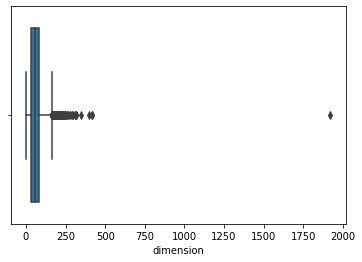

In [ ]:
#menampilkan boxplot nilai kolom dimensi
sns.boxplot(x=df_update['dimension'])
plt.show()